In [5]:
import pandas as pd
df = pd.read_csv('/content/temp-data.csv')

# New section

In [6]:
print(df.head(10))

                                    id  room_id/id  ... temp  out/in
0  __export__.temp_log_196134_bd201015  Room Admin  ...   29      In
1  __export__.temp_log_196131_7bca51bc  Room Admin  ...   29      In
2  __export__.temp_log_196127_522915e3  Room Admin  ...   41     Out
3  __export__.temp_log_196128_be0919cf  Room Admin  ...   41     Out
4  __export__.temp_log_196126_d30b72fb  Room Admin  ...   31      In
5  __export__.temp_log_196125_b0fa0b41  Room Admin  ...   31      In
6  __export__.temp_log_196121_01544d45  Room Admin  ...   29      In
7  __export__.temp_log_196122_f8b80a9f  Room Admin  ...   29      In
8  __export__.temp_log_196111_6b7a0848  Room Admin  ...   29      In
9  __export__.temp_log_196112_e134aebd  Room Admin  ...   29      In

[10 rows x 5 columns]


In [7]:
# Checking for null values
print(df.isnull().values.any())

False


In [8]:
# converting string to datetime
from datetime import date, datetime
def convert_to_datetime(temp):
  print(temp.get('noted_date'))
  date_str = temp['noted_date']
  temp['noted_date'] = datetime.strptime(date_str, '%d-%m-%Y %H:%M')
  return temp

df = df.apply(convert_to_datetime,axis=1)

Streaming output truncated to the last 5000 lines.
03-09-2018 20:17
03-09-2018 20:17
03-09-2018 20:17
03-09-2018 20:17
03-09-2018 20:17
03-09-2018 20:17
03-09-2018 20:17
03-09-2018 20:17
03-09-2018 20:17
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:16
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:15
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:14
03-09-2018 20:13
03-09-2018 20:13
03-09-2018 20:13
03-09-2018 20:13
03-09-2018 20:13
03-09-2018 20:

In [ ]:
# Adding seasons in dataframe

seasons = {12: 'winter',1:'winter',2:'spring',3:'spring',4:'summer',5:'summer',6:'summer',7:'monsoon',8:'monsoon',9:'monsoon',10:'autumn',11:'autumn'}

def get_season(date_log):
  date_log['season'] = seasons.get(date_log['noted_date'].month)
  return date_log

df = df.apply(get_season, axis=1)

In [ ]:
print(df.head())

                                    id  room_id/id  ... out/in  season
0  __export__.temp_log_196134_bd201015  Room Admin  ...     In  winter
1  __export__.temp_log_196131_7bca51bc  Room Admin  ...     In  winter
2  __export__.temp_log_196127_522915e3  Room Admin  ...    Out  winter
3  __export__.temp_log_196128_be0919cf  Room Admin  ...    Out  winter
4  __export__.temp_log_196126_d30b72fb  Room Admin  ...     In  winter

[5 rows x 6 columns]


In [ ]:
# Finding means of different seasons
means = df.groupby(['season']).mean()
print(means)

              temp
season            
autumn   39.206090
monsoon  31.031749
winter   34.433789


In [ ]:
min_max_season = df.groupby(['season']).agg({'temp': ['min', 'max']})
print(min_max_season)

NameError: ignored

In [ ]:
# Finding means base on in and out tempratures
means = df.groupby(['season','out/in']).mean()
print(means)

                     temp
season  out/in           
autumn  In      31.209008
        Out     39.926685
monsoon In      30.613805
        Out     31.222987
winter  In      28.401540
        Out     37.327955


In [ ]:
# Finding min max based on in and out tempratures
min_max_season = df.groupby(['season','out/in']).agg({'temp': ['min', 'max']})
print(min_max_season)

               temp    
                min max
season  out/in         
autumn  In       22  36
        Out      31  50
monsoon In       24  41
        Out      24  51
winter  In       21  31
        Out      25  43


In [ ]:
# Assigning time of the day 
input_df = df
df['time_of_day'] = (df['noted_date'].dt.hour % 24 + 4) // 4
df['time_of_day'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [ ]:
df.drop_duplicates(subset=[],inplace=True)
len(df)
mask = item_file_df.duplicated(subset=['Bar Code*'], keep='first')
df_keep = item_file_df.loc[~mask]
df_droplog = df_droplog.append(item_file_df.loc[mask])
item_file_df = item_file_df.drop_duplicates(subset=['Bar Code*'], keep='first')
error_df = error_df.append(df_droplog)
df.droplog()

97605

In [ ]:
# Finding means base on in and out tempratures and time of the day 
means = df.groupby(['season','out/in','time_of_day']).mean()
means

temp
season  out/in time_of_day             
autumn  In     Early Morning  30.425721
               Evening        32.087558
               Late Night     31.826014
               Morning        30.912341
               Night          32.511364
               Noon           30.778966
        Out    Early Morning  40.744489
               Evening        39.655823
               Late Night     37.483562
               Morning        43.471882
               Night          38.401971
               Noon           40.748454
monsoon In     Early Morning  30.962012
               Evening        29.947795
               Late Night     29.564815
               Morning        31.015672
               Night          30.058474
               Noon           30.999432
        Out    Early Morning  34.150238
               Evening        30.043265
               Late Night     30.472405
               Morning        32.509430
               Night          30.066034
               Noon           31.463682
winter  In     Early Morning  27.435039
               Evening        29.564626
               Late Night     28.325472
               Morning        27.692800
               Night          29.621429
               Noon           29.240356
        Out    Early Morning  38.123369
               Evening        37.217934
               Late Night     34.644380
               Morning        40.539846
               Night          35.964953
               Noon           38.468792

In [ ]:
# Finding min max based on in and out tempratures and time of the day 
min_max_season = df.groupby(['season','out/in','time_of_day']).agg({'temp': ['min', 'max']})
print(min_max_season)

                             temp    
                              min max
season  out/in time_of_day           
autumn  In     Early Morning   23  35
               Evening         22  35
               Late Night      26  35
               Morning         22  35
               Night           29  36
               Noon            25  35
        Out    Early Morning   36  50
               Evening         34  49
               Late Night      31  47
               Morning         38  50
               Night           33  49
               Noon            37  49
monsoon In     Early Morning   24  35
               Evening         27  35
               Late Night      25  34
               Morning         24  36
               Night           25  34
               Noon            25  41
        Out    Early Morning   24  50
               Evening         26  51
               Late Night      26  50
               Morning         26  50
               Night           25  50
            

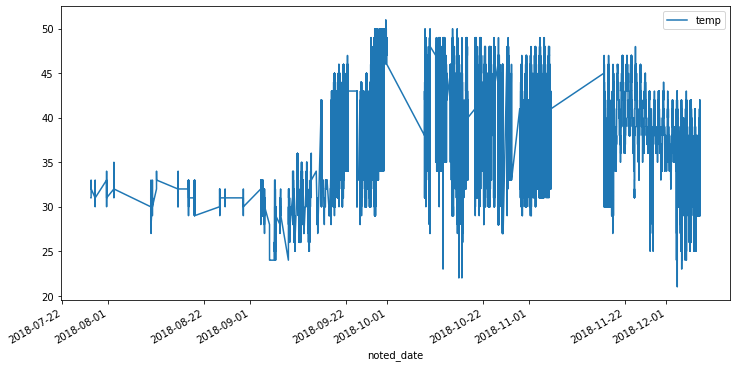

In [ ]:
df.plot(x='noted_date', y='temp', figsize=(12,6))

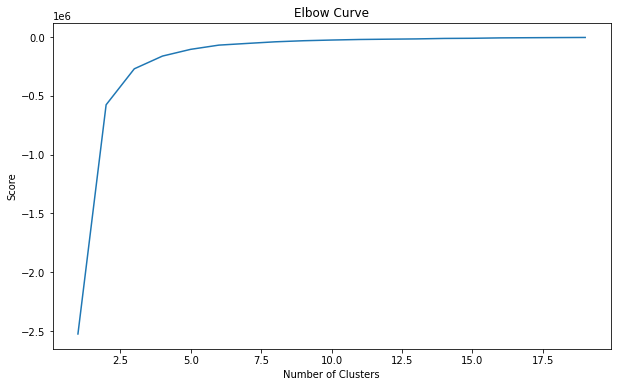

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = df.groupby('out/in').get_group('Out')
data = df[['temp']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [9]:
df.sort_values(by='noted_date')

,id,room_id/id,noted_date,temp,out/in
97605,__export__.temp_log_133741_32958703,Room Admin,2018-07-28 07:06:00,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,2018-07-28 07:06:00,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,2018-07-28 07:06:00,31,In
97576,__export__.temp_log_118398_6ebe504d,Room Admin,2018-07-28 07:07:00,31,In
97577,__export__.temp_log_144221_a4f20688,Room Admin,2018-07-28 07:07:00,31,In
...,...,...,...,...,...
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-12-08 09:29:00,31,In
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-12-08 09:29:00,41,Out
2,__export__.temp_log_196127_522915e3,Room Admin,2018-12-08 09:29:00,41,Out
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-12-08 09:30:00,29,In


In [31]:
rolling_mean = df.temp.rolling(window=10).mean()
df['smooth_temp'] = rolling_mean

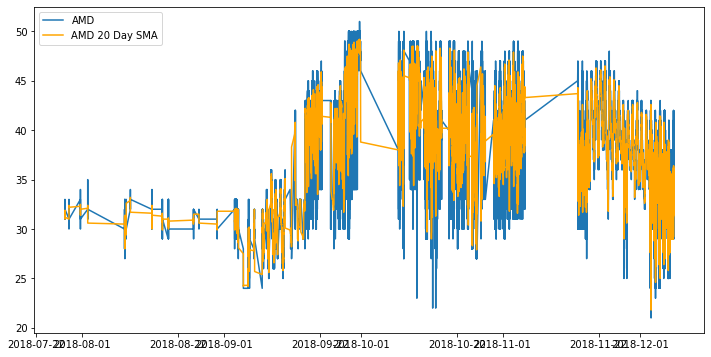

In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(df.noted_date, df.temp, label='AMD')
plt.plot(df.noted_date, rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.legend(loc='upper left')
plt.show()

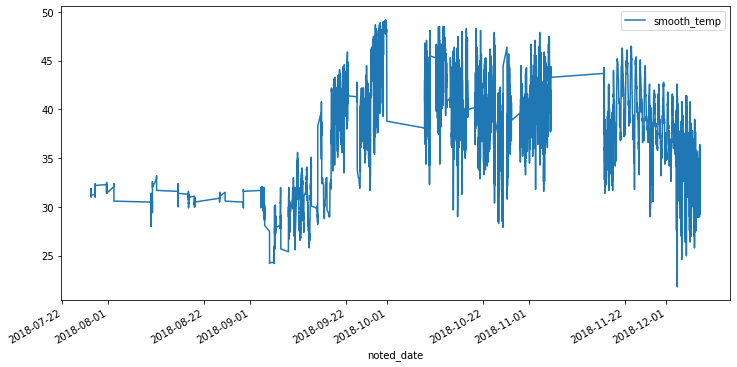

In [36]:
df.plot(x='noted_date',y='smooth_temp',figsize=(12,6))

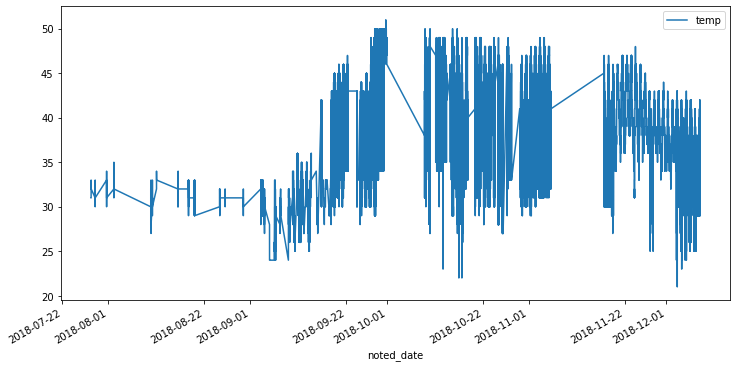

In [37]:
df.plot(x='noted_date',y='temp',figsize=(12,6))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X = df[['temp']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=4)
km.fit(X)
km.predict(X)
labels = km.labels_
print(labels,len(labels))